2.3347201
2.3346324
2.3354971
2.3316133


/var/folders/01/f14lxpfj5wl28zjtf5rz8t9c0000gn/T/ipykernel_55064/385998983.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


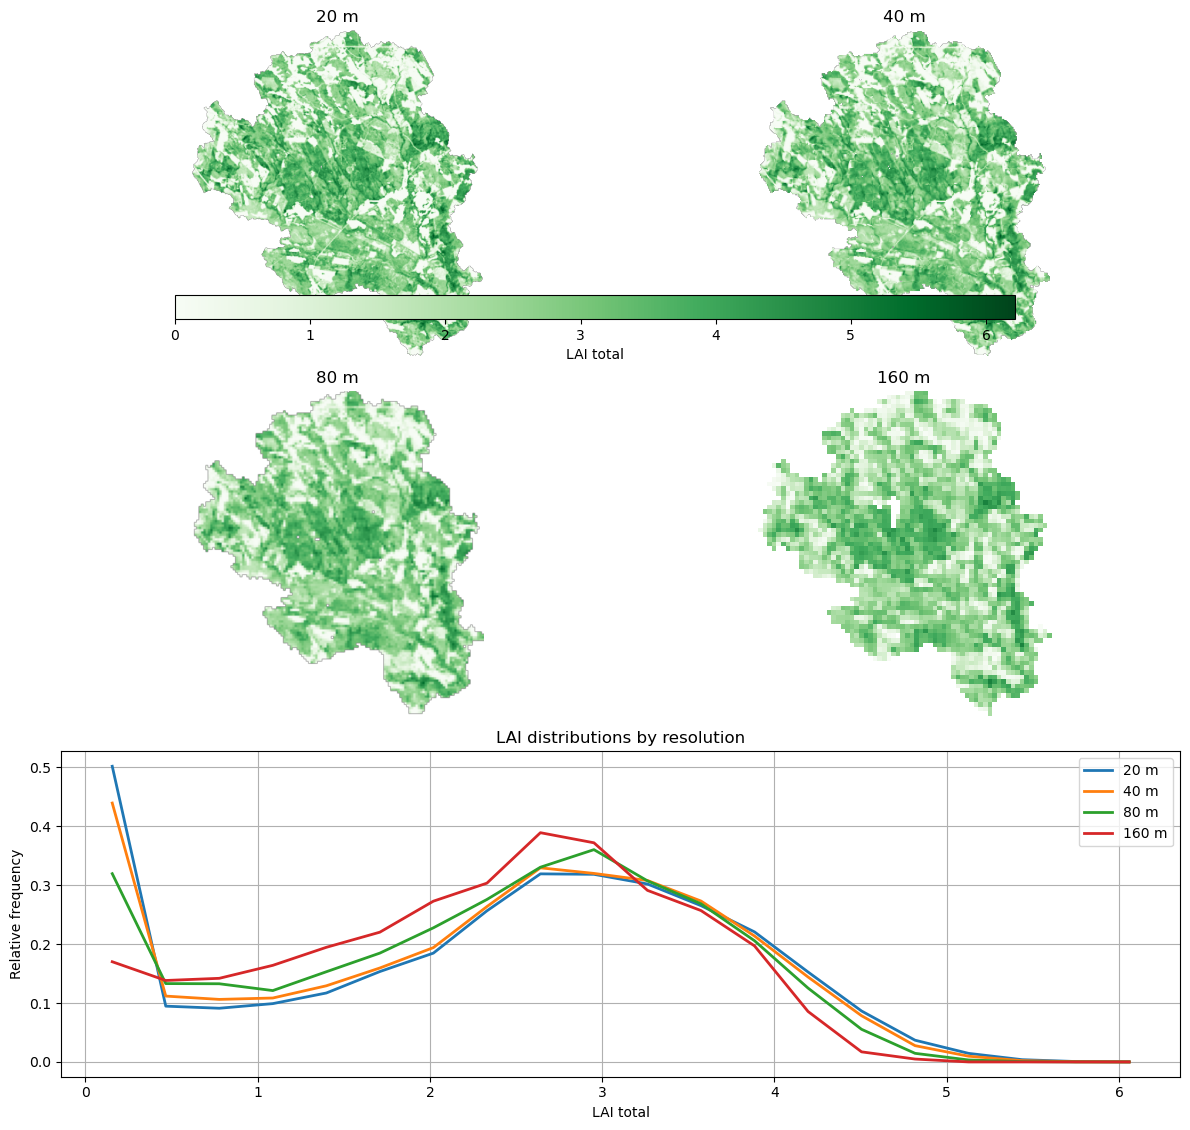

In [20]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np

resos = [20, 40, 80, 160]
lai_data_list = []

# Read rasters and store
for reso in resos:
    file = f'/Users/jpnousu/Krycklan_GIS_data/{reso}m/ALL/LAI_tot.asc'
    with rasterio.open(file) as src:
        data = src.read(1)
        nodata = src.nodata if src.nodata is not None else -9999
        data = np.where(data == nodata, np.nan, data)
        lai_data_list.append(data)

# Compute global min/max ignoring nodata
all_values = np.concatenate([d[~np.isnan(d)].ravel() for d in lai_data_list])
vmin = np.min(all_values)
vmax = np.max(all_values)

# Define bins for PDF line plots
num_bins = 20
bins = np.linspace(vmin, vmax, num_bins + 1)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create figure
fig = plt.figure(figsize=(12, 12))

# Top 2 rows: 4 LAI maps in 2x2 grid
for i, reso in enumerate(resos):
    row = i // 2
    col = i % 2
    ax = plt.subplot2grid((3, 2), (row, col))
    data = lai_data_list[i]
    file = f'/Users/jpnousu/Krycklan_GIS_data/{reso}m/ALL/LAI_tot.asc'
    with rasterio.open(file) as src:
        extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    im = ax.imshow(data, extent=extent, origin='upper', cmap='Greens',
                   vmin=vmin, vmax=vmax)
    ax.set_title(f'{reso} m')
    ax.axis('off')

# Add horizontal colorbar for maps (spanning both columns)
cbar_ax = fig.add_axes([0.15, 0.68, 0.7, 0.02])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='LAI total')

# Bottom row: 1 subplot spanning both columns for line distributions
ax_dist = plt.subplot2grid((3, 2), (2, 0), colspan=2)
for i, reso in enumerate(resos):
    data = lai_data_list[i][~np.isnan(lai_data_list[i])].ravel()
    hist, _ = np.histogram(data, bins=bins, density=True)
    ax_dist.plot(bin_centers, hist, label=f'{reso} m', linewidth=2)

ax_dist.set_xlabel('LAI total')
ax_dist.set_ylabel('Relative frequency')
ax_dist.set_title('LAI distributions by resolution')
ax_dist.legend()
ax_dist.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [19]:
np.mean(data)

np.float32(2.3316133)